# Overview
This code connects to a MongoDB database and performs data analysis on a collection of game lineups. The analysis includes data cleaning, statistical summaries, and various visualizations using Plotly and other Python libraries.


## Data Connection and Loading

In [207]:
from sqlalchemy import create_engine 
import matplotlib.pyplot as plt  
from IPython.display import display,clear_output  
from matplotlib import ticker  
import pandas as pd  
import geopandas as gpd  
import plotly.express as px 
import numpy as np  
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
from pymongo import MongoClient

# Connessione a MongoDB
mongo_client = MongoClient('mongodb://localhost:27017/')
mongo_db = mongo_client['MongoDB_project']

# Lettura della collezione games_lineups
games_lineups_collection = mongo_db['gamelineups']
games_lineups = pd.DataFrame(list(games_lineups_collection.find()))

print(games_lineups.head())

                        _id                   game_lineups_id  game_id  \
0  6613c0e554a57856bcffe6fc  77b0f371923e0c8bdf050a1e269faaac  3606208   
1  6613c0e554a57856bcffe6fd  cb6eeedb9f728570615d37b6fe7facaf  3606208   
2  6613c0e554a57856bcffe6fe  8e63d5f47aac2bdb0e54f5481986e104  3606208   
3  6613c0e554a57856bcffe6ff  ea4a96d8be410f2d646cf095c4faae7f  3606208   
4  6613c0e554a57856bcffe700  e6abe553801b09bc623c3deb96acba17  3606208   

   club_id             type number  player_id         player_name  \
0      338  starting_lineup     89     419061  Vladyslav Supryaga   
1      338  starting_lineup     10     368611   Mykola Shaparenko   
2      338  starting_lineup      5     124182    Sergiy Sydorchuk   
3      338  starting_lineup     94     181118     Tomasz Kedziora   
4      338  starting_lineup     16     404842   Vitaliy Mykolenko   

   team_captain            position  
0             0      Centre-Forward  
1             0    Central Midfield  
2             1  Defensive

# Data Cleaning and Analysis

In [208]:
def clean_data(df):
    df['number'] = df['number'].astype(str).str.replace('-', '')
    df.replace(to_replace=[None, 'null', 'undefined', ''], value=pd.NA, inplace=True)
    df['number'] = pd.to_numeric(df['number'], errors='coerce').astype('Int64')    
    return df

# Pulizia del dataset
games_lineups = clean_data(games_lineups)

print(games_lineups.info())
print("\n")
print(games_lineups.describe())
print("\n")
print(games_lineups.type)

lineups_stats = games_lineups.describe(include='all')
print(lineups_stats)

print("Valori della colonna 'number':")
print(games_lineups['number'])
    
na_count = games_lineups['number'].isna().sum()
print(f"Numero di valori NA nella colonna 'number': {na_count}")

print("Valori NA della colonna 'number':")
print(games_lineups[games_lineups['number'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119133 entries, 0 to 119132
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              119133 non-null  object
 1   game_lineups_id  119133 non-null  object
 2   game_id          119133 non-null  int64 
 3   club_id          119133 non-null  int64 
 4   type             119133 non-null  object
 5   number           117778 non-null  Int64 
 6   player_id        119133 non-null  int64 
 7   player_name      119133 non-null  object
 8   team_captain     119133 non-null  int64 
 9   position         119133 non-null  object
dtypes: Int64(1), int64(4), object(5)
memory usage: 9.2+ MB
None


            game_id        club_id     number     player_id   team_captain
count  1.191330e+05  119133.000000   117778.0  1.191330e+05  119133.000000
mean   4.130364e+06    8888.762694  22.541103  4.494484e+05       0.046041
std    3.843767e+04   18472.811694  21.380342

# Analysis and Graph of Missing Values

Valori mancanti per ogni colonna:
_id                   0
game_lineups_id       0
game_id               0
club_id               0
type                  0
number             1355
player_id             0
player_name           0
team_captain          0
position              0
dtype: int64


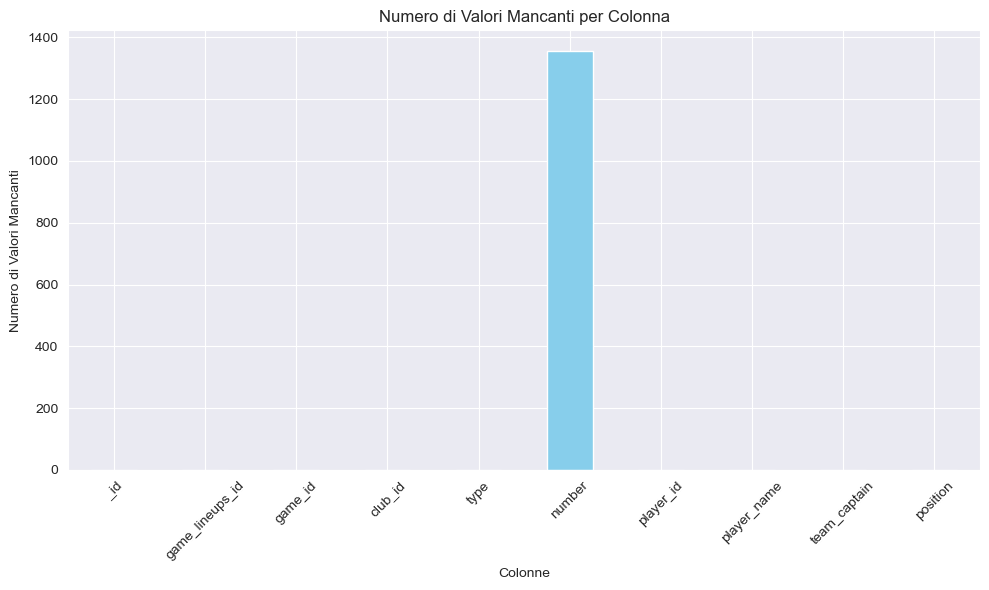

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119133 entries, 0 to 119132
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              119133 non-null  object
 1   game_lineups_id  119133 non-null  object
 2   game_id          119133 non-null  int64 
 3   club_id          119133 non-null  int64 
 4   type             119133 non-null  object
 5   number           117778 non-null  Int64 
 6   player_id        119133 non-null  int64 
 7   player_name      119133 non-null  object
 8   team_captain     119133 non-null  int64 
 9   position         119133 non-null  object
dtypes: Int64(1), int64(4), object(5)
memory usage: 9.2+ MB
None


            game_id        club_id     number     player_id   team_captain
count  1.191330e+05  119133.000000   117778.0  1.191330e+05  119133.000000
mean   4.130364e+06    8888.762694  22.541103  4.494484e+05       0.046041
std    3.843767e+04   18472.811694  21.380342

In [209]:
# Analisi dei valori mancanti
missing_values = games_lineups.isna().sum()
print("Valori mancanti per ogni colonna:")
print(missing_values)

# Visualizzazione dei valori mancanti in un grafico a barre
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Numero di Valori Mancanti per Colonna')
plt.xlabel('Colonne')
plt.ylabel('Numero di Valori Mancanti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stampa delle informazioni del dataset pulito
print(games_lineups.info())
print("\n")
print(games_lineups.describe())
print("\n")

lineups_stats = games_lineups.describe(include='all')
print(lineups_stats)

missing_values = games_lineups.isna().sum()
print("Valori mancanti per ogni colonna:")
print(missing_values)

print("Valori della colonna 'number':")
print(games_lineups['number'])
    
na_count = games_lineups['number'].isna().sum()
print(f"Numero di valori NA nella colonna 'number': {na_count}")

# Frequent Captains and Position Distribution by Lineup Type

In [210]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Capitani di squadra
captains = games_lineups[games_lineups['team_captain'] == 1]['player_name'].value_counts().reset_index()
captains.columns = ['player_name', 'count']

fig = px.bar(captains.head(10), x='count', y='player_name', orientation='h', title='Capitani più Frequenti', 
             color='count', color_continuous_scale='Viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  xaxis_title='Numero di Volte Capitano',
                  yaxis_title='Giocatore')
fig.show()



# Distribuzione delle posizioni in base al tipo di schieramento
type_position_distribution = games_lineups.groupby(['type', 'position']).size().unstack().fillna(0)

# Reset dell'indice
type_position_distribution = type_position_distribution.reset_index()

# Creazione del grafico
fig = px.bar(type_position_distribution, x='type', y=type_position_distribution.columns[1:], 
             title='Distribuzione delle Posizioni per Tipo di Schieramento', barmode='stack',
             labels={'value':'Numero di Giocatori', 'type':'Tipo di Schieramento'},
             color_discrete_sequence=px.colors.sequential.Plasma)

fig.update_layout(xaxis_title='Tipo di Schieramento', yaxis_title='Numero di Giocatori')
fig.show()



# Captain and Non-Captain Position Distribution

In [211]:
# Contare le occorrenze delle posizioni come capitani e non capitani
position_counts = games_lineups.groupby(['position', 'team_captain']).size().reset_index(name='count')

# Mappare i valori del team_captain per una leggenda comprensibile
position_counts['team_captain'] = position_counts['team_captain'].map({1: 'Capitano', 0: 'Non Capitano'})

# Creare un grafico a barre impilate
fig = px.bar(position_counts, x='position', y='count', color='team_captain', 
             title='Distribuzione delle Posizioni tra Capitani e Non Capitani',
             labels={'position': 'Posizione', 'count': 'Numero di Giocatori', 'team_captain': 'Ruolo'},
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Posizione',
    yaxis_title='Numero di Giocatori',
    legend_title_text='Ruolo',
    plot_bgcolor='white'
)

fig.show()

# Jersey Number Distribution

In [212]:
# Distribuzione dei numeri di maglia
jersey_number_distribution = games_lineups['number'].value_counts().reset_index()
jersey_number_distribution.columns = ['number', 'count']

# Creare un treemap per la distribuzione dei numeri di maglia
fig = px.treemap(jersey_number_distribution, path=['number'], values='count', 
                 title='Distribuzione dei Numeri di Maglia',
                 labels={'number': 'Numero di Maglia', 'count': 'Numero di Giocatori'},
                 color='count',
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

# Interactive Player Count by Jersey Number

In [213]:
# Creare una lista di numeri di maglia unici
unique_numbers = games_lineups['number'].dropna().unique()
unique_numbers = sorted(unique_numbers)

# Funzione per aggiornare l'output in base al numero di maglia selezionato
def update_output(change):
    with output:
        output.clear_output()
        number = change['new']
        if number:
            filtered_df = games_lineups[games_lineups['number'] == number]
            if not filtered_df.empty:
                player_counts = filtered_df['player_name'].value_counts().reset_index()
                player_counts.columns = ['player_name', 'count']
                player_counts = player_counts.sort_values('count', ascending=False).head(10)  # Mostra solo i primi 10 giocatori
                
                fig = px.bar(player_counts, x='count', y='player_name', orientation='h',
                             title=f'Principali giocatori con il numero di maglia {number}',
                             labels={'count': 'Numero di Volte', 'player_name': 'Nome del Giocatore'},
                             text='count')
                
                fig.update_layout(
                    xaxis_title='Numero di Volte',
                    yaxis_title='Nome del Giocatore',
                    plot_bgcolor='white'
                )
                
                fig.update_traces(marker_color='blue', textposition='outside')
                
                display(fig)
            else:
                display("Nessun giocatore trovato per questo numero di maglia.")
        else:
            display("Seleziona un numero di maglia per vedere i giocatori.")

# Creare il widget di menu a cascata per selezionare il numero di maglia
number_dropdown = widgets.Dropdown(
    options=[('Seleziona un numero di maglia', '')] + [(num, num) for num in unique_numbers],
    value=10,
    description='Numero di Maglia:'
)

# Impostare il callback per aggiornare l'output
output = widgets.Output()
number_dropdown.observe(update_output, names='value')

# Visualizzare il widget di menu a cascata
display(number_dropdown, output)

# Aggiornare l'output iniziale con il valore predefinito
update_output({'new': 10})

Dropdown(description='Numero di Maglia:', index=10, options=(('Seleziona un numero di maglia', ''), (1, 1), (2…

Output()

# Top Captains Analysis

In [214]:
# Filtrare i dati per i capitani
captains_df = games_lineups[games_lineups['team_captain'] == 1]

# Contare le occorrenze di ciascun giocatore come capitano
captain_counts = captains_df['player_name'].value_counts().reset_index()
captain_counts.columns = ['player_name', 'count']

# Unire con i dati originali per ottenere il numero di maglia e la posizione
captain_details = pd.merge(captain_counts, games_lineups[['player_name', 'number', 'position']], on='player_name', how='left').drop_duplicates()

# Prendere i primi 10 capitani più frequenti
top_captains = captain_details.head(10)

# Creare il grafico a bolle
fig = px.scatter(top_captains, x='number', y='count', size='count', color='position',
                 hover_name='player_name', title='I migliori giocatori che sono stati più volte capitani',
                 labels={'number': 'Numero di Maglia', 'count': 'Numero di Volte Capitano', 'position': 'Posizione'},
                 size_max=60)

# Migliorare il layout del grafico
fig.update_layout(
    title_font_size=22,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    legend_title_text='Posizione',
    plot_bgcolor='white',
    paper_bgcolor='rgb(248, 248, 255)',
    font=dict(family="Arial, sans-serif", size=14, color='black')
)

# Aggiungere annotazioni
annotations = []
for i, row in top_captains.iterrows():
    annotations.append(
        dict(
            x=row['number'], y=row['count'],
            text=row['player_name'],
            showarrow=True,
            arrowhead=2,
            ax=20,
            ay=-40,
            font=dict(size=12, color='black'),
            bgcolor='rgba(255, 255, 255, 0.8)',
            bordercolor='black'
        )
    )
fig.update_layout(annotations=annotations)

fig.show()